## KNN (K_Nearest Neighbors) Model

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE


In [90]:
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")

In [91]:
# Define the feature matrix X and the target vector y
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [94]:
# Initialize and train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Generate confusion matrix
conf_matrix_knn = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Generate classification report
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Predict probabilities for the positive class
probabilities = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Print the evaluation results
print("")
print(f"Accuracy: {accuracy_knn}")
print("\nConfusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", classification_rep_knn)
print("\nROC AUC:\n", roc_auc)


Accuracy: 0.9264705882352942

Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1634    90  1724
1           160  1516  1676
All        1794  1606  3400

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1724
           1       0.94      0.90      0.92      1676

    accuracy                           0.93      3400
   macro avg       0.93      0.93      0.93      3400
weighted avg       0.93      0.93      0.93      3400


ROC AUC:
 0.9721183183914857


## Before SMOTE

- Confusion Matrix: The model predicted 'non-churn' (0) for 151 cases correctly and 'churn' (1) for 1661 cases correctly. However, there are 176 false positives (Type I error) and 38 false negatives (Type II error).

- Precision and Recall:
For class 0 (non-churn), precision is 0.80 (out of all predicted non-churn, 80% were correct), and recall is 0.46 (out of all actual non-churn, 46% were correctly predicted).
For class 1 (churn), precision is high at 0.90, meaning the model is reliable when it predicts churn. Recall is also high at 0.98, indicating the model captures 98% of all churn cases.

- F1-Score: Shows a high effectiveness of the model dealing with class 1 predictions (0.94), while class 0 is lower at 0.59, which might suggest a potential area for improvement in identifying non-churn cases.

- ROC AUC: A score of 0.88 suggests a good discriminatory ability between churn and non-churn cases. It implies that the model does a good job of ranking predictions higher for actual churns than non-churns.

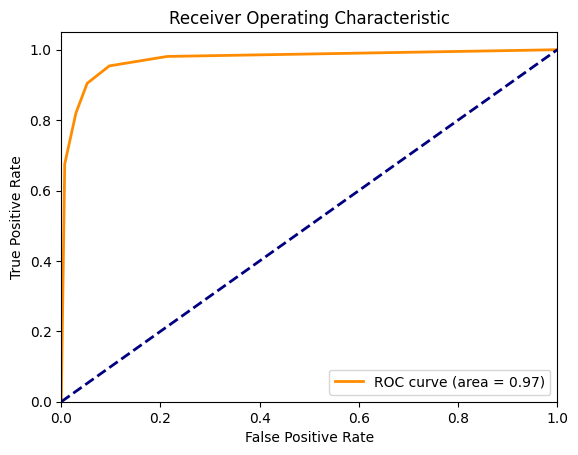

In [95]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [96]:
# Perform cross-validation
cv_score = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_score)

Cross-Validation Scores: [0.76011846 0.84205331 0.9254321  0.93432099 0.84098765]


Cross-Validation Scores: [0.76011846 0.84205331 0.9254321  0.93432099 0.84098765]
Mean CV Score: 0.8605825015538737
Standard Deviation in CV Scores: 0.06397366226944474


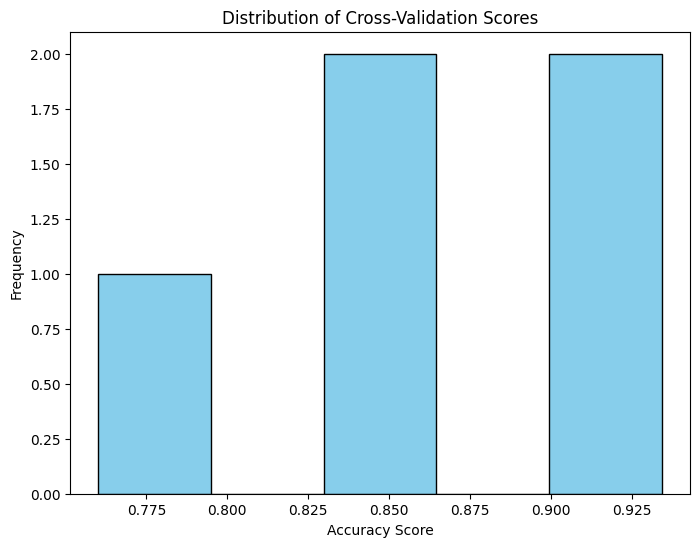

In [97]:
# Perform enhanced cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print detailed cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation in CV Scores:", std_cv_score)

# Plotting the distribution of cross-validation scores
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Cross-Validation Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.show()
